# IMDB Review

## Problem Statement

Build multiple machine learning models and select best one for sentiment analysis. Based on user comment your model should be able to predict if the movie is worth to watch or not.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the IMDB dataset 1
df1=pd.read_csv('IMDB-Dataset 1.csv')
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
24994,I have seen this movie at the cinema many year...,negative
24995,This movie was a real torture fest to sit thro...,negative
24996,John Wayne & Albert Dekker compete for oil rig...,negative
24997,Tarantino once remarked on a melodrama from th...,positive


In [3]:
#Loading the IMDB dataset 2
df2=pd.read_csv('IMDB-Dataset 2.csv')
df2

,review,sentiment
0,This film should have never been made. Honestl...,negative
1,This movie was bad from the start. The only pu...,negative
2,"God, I never felt so insulted in my whole life...",negative
3,Not being a fan of the Coen Brothers or George...,positive
4,The movie Andaz Apna Apna in my books is the t...,positive
...,...,...
24996,I thought this movie did a down right good job...,positive
24997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
24998,I am a Catholic taught in parochial elementary...,negative
24999,I'm going to have to disagree with the previou...,negative


In [4]:
#Combine both the dataset into one using the concat method
df=pd.concat([df1,df2],axis=0)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
24996,I thought this movie did a down right good job...,positive
24997,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
24998,I am a Catholic taught in parochial elementary...,negative
24999,I'm going to have to disagree with the previou...,negative


In [5]:
df.shape #Checking the shape of data

(50000, 2)

There are 50000 rows and 2 columns

In [6]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
24996  I thought this movie did a down right good job...  positive
24997  Bad plot, bad dialogue, bad acting, idiotic di...  negative
24998  I am a Catholic taught in parochial elementary...  negative
24999  I'm going to have to disagree with the previou...  negative
25000  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [7]:
df.dtypes

review       object
sentiment    object
dtype: object

Both Review and Sentiment is object data type

In [8]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

There is no null value present in the dataset

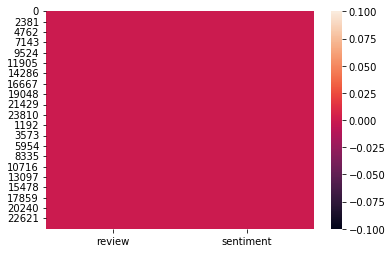

In [9]:
sns.heatmap(df.isnull()) #Checking the null value using the heatmap
plt.show()

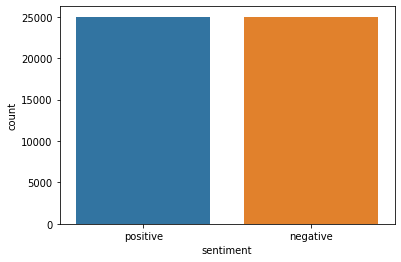

In [10]:
sns.countplot(df['sentiment']) #Checking the count of sentiment using the countplot
plt.show()

In [11]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

Both positive and negative value count is 25000

In [12]:
df.describe(include='all') #Checking the statistical summary of data

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [13]:
df.nunique() #Checking the unique value

review       49582
sentiment        2
dtype: int64

There are 2 unique values in sentiment that is postive and negative.

In [14]:
#Let's replace the positive with 0 and negative with 1
df['sentiment']=df['sentiment'].replace('positive',0)
df['sentiment']=df['sentiment'].replace('negative',1)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0
...,...,...
24996,I thought this movie did a down right good job...,0
24997,"Bad plot, bad dialogue, bad acting, idiotic di...",1
24998,I am a Catholic taught in parochial elementary...,1
24999,I'm going to have to disagree with the previou...,1


0    25000
1    25000
Name: sentiment, dtype: int64


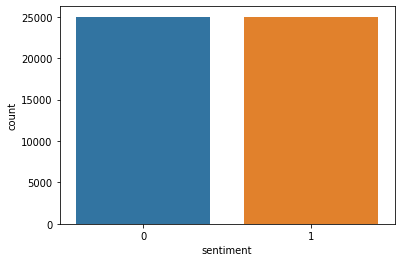

In [15]:
print(df['sentiment'].value_counts())
sns.countplot(df['sentiment'])  #Checking the countplot of sentiment after the conversion into 0 and 1
plt.show()

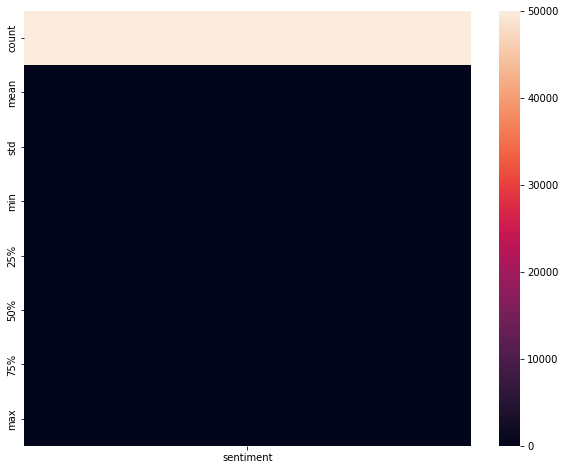

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.describe())  #Checking the description of data using the heatmap
plt.show()

In [17]:
df.sample(6) #Checking the random 6 samples data

,review,sentiment
3034,"Seven Pounds, this was the movie where I was j...",0
7394,"First saw this movie in about 1990, and absolu...",0
2240,"Another ""end of the world"" film that begs comp...",0
604,its awful i cant believe that one of the great...,1
2290,Maybe the target audience of this Disney Chann...,1
16032,After missing out on this innumerable times on...,1


In [18]:
df['review']=df['review'].apply(lambda x: x.lower()) #Converting the review text to lower case
df.sample(8)

,review,sentiment
9315,this film contains more action before the open...,0
24883,this movie is one of the sleepers of all time....,0
18931,jeremy northam's characterization of the stutt...,0
16202,"i though that it was hard, if not impossible, ...",1
20518,shame represents a high point in the career of...,0
9204,"i watched this today, partially attracted to t...",1
3812,"now, i flicked onto this just out of curiosity...",1
21653,anastasia: the mystery of anna was a two-part ...,0


In [19]:
#Removing the punctuation
df['review']=df['review'].replace(['\w\s\n'],'')
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,0
1,a wonderful little production. <br /><br />the...,0
2,i thought this was a wonderful way to spend ti...,0
3,basically there's a family where a little boy ...,1
4,"petter mattei's ""love in the time of money"" is...",0
...,...,...
24996,i thought this movie did a down right good job...,0
24997,"bad plot, bad dialogue, bad acting, idiotic di...",1
24998,i am a catholic taught in parochial elementary...,1
24999,i'm going to have to disagree with the previou...,1


In [20]:
#Removing the stopwords
stop_words=stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
df['review']=df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df['review'][1]


1    wonderful little production. <br /><br />the f...
1    movie bad start. purpose movie angela wanted g...
Name: review, dtype: object

In [22]:
df['review'][2:5]

2    thought wonderful way spend time hot summer we...
3    basically there's family little boy (jake) thi...
4    petter mattei's "love time money" visually stu...
Name: review, dtype: object

In [23]:
def decontracted(text):
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don’t", "do not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"im ", "i am", text)
    text = re.sub(r"yo ", "you ",text)
    text = re.sub(r"doesn’t", "does not",text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r'http\S+', '', text) #removing urls
    return text

In [24]:
# Remove noice

def scrub_words(text):
    text=re.sub("(<.*?>)","",text)
    text=re.sub("(\\W)"," ",text)
    text=re.sub("(\\d)","",text)
    text=text.strip()
    return text

In [25]:
df['review']=df['review'].apply(lambda x:scrub_words(x))

In [26]:
df['review'].head()

0    one reviewers mentioned watching  oz episode h...
1    wonderful little production  the filming techn...
2    thought wonderful way spend time hot summer we...
3    basically there s family little boy  jake  thi...
4    petter mattei s  love time money  visually stu...
Name: review, dtype: object

In [27]:
df.sample(10)

,review,sentiment
904,major spoilers warnedi saw movie yesterday ve...,0
2444,tv series foolish unconventional english gentl...,0
18752,film like much music either underrated unnot...,0
17316,as fan bad movies and mstk member mftk mus...,1
16375,performance volatile graceful al pacino re te...,0
15499,came back el otro playing buenos aires say d...,1
12202,actually like movie even though fancy james be...,0
16780,long film important character south africa st...,0
3783,ok really king s stuff dreadful whole movie...,1
4034,given roger corman attached name production h...,1


In [28]:
#Checking the review count
df['review_count']=df['review'].apply(lambda x: len(str(x).split(' ')))
df

,review,sentiment,review_count
0,one reviewers mentioned watching oz episode h...,0,223
1,wonderful little production the filming techn...,0,115
2,thought wonderful way spend time hot summer we...,0,113
3,basically there s family little boy jake thi...,1,92
4,petter mattei s love time money visually stu...,0,157
...,...,...,...
24996,thought movie right good job creative origina...,0,116
24997,bad plot bad dialogue bad acting idiotic di...,1,70
24998,catholic taught parochial elementary schools n...,1,146
24999,i m going disagree previous comment side malti...,1,143


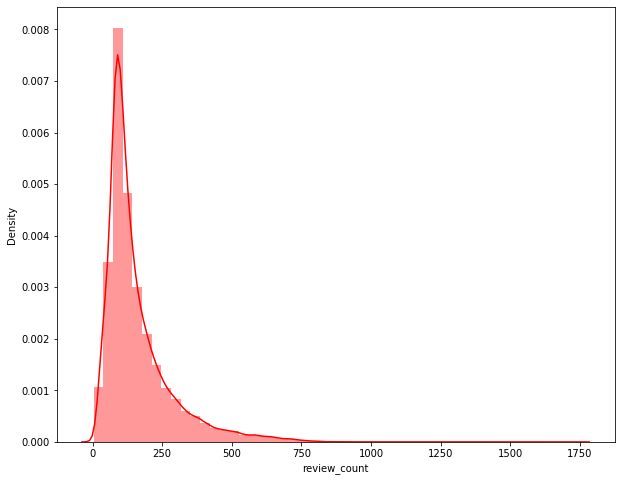

In [29]:
#Visualizing the review count using the distribution plot
plt.figure(figsize=(10,8))
sns.distplot(df['review_count'],color='red')
plt.show()

We see that count from 750 it lies in a straight line.

In [30]:
#Checking the count of character in review
df['review_char']=df['review'].str.len()
df

,review,sentiment,review_count,review_char
0,one reviewers mentioned watching oz episode h...,0,223,1198
1,wonderful little production the filming techn...,0,115,707
2,thought wonderful way spend time hot summer we...,0,113,615
3,basically there s family little boy jake thi...,1,92,481
4,petter mattei s love time money visually stu...,0,157,899
...,...,...,...,...
24996,thought movie right good job creative origina...,0,116,574
24997,bad plot bad dialogue bad acting idiotic di...,1,70,417
24998,catholic taught parochial elementary schools n...,1,146,851
24999,i m going disagree previous comment side malti...,1,143,868


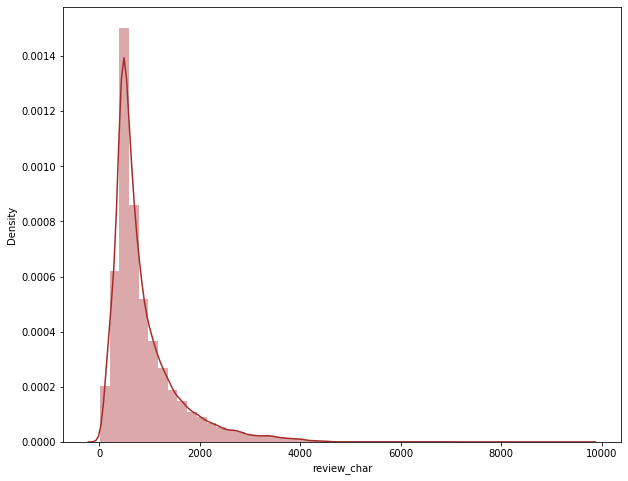

In [31]:
#Visualizing the review character using the distribution plot
plt.figure(figsize=(10,8))
sns.distplot(df['review_char'],color='brown')
plt.show()

In the review character count we see the flatten tail in the range of 4000-10000.

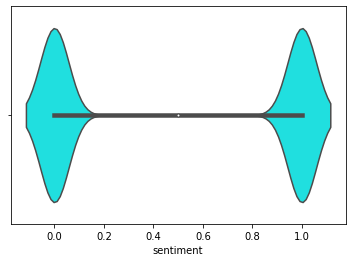

In [32]:
sns.violinplot(df['sentiment'],color='aqua')

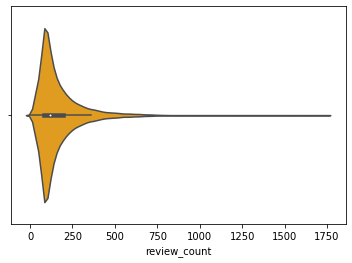

In [33]:
sns.violinplot(df['review_count'],color='orange')

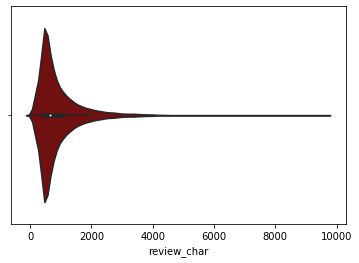

In [34]:
sns.violinplot(df['review_char'],color='maroon')

# Removing Outliers

In [35]:
from scipy.stats import zscore


In [36]:
outliers=df[['review_count','review_char']]

In [37]:
z=np.abs(zscore(outliers))
z

array([[0.5130786 , 0.46546581],
       [0.3712672 , 0.25569447],
       [0.38764397, 0.39082023],
       ...,
       [0.1174272 , 0.04419329],
       [0.14199236, 0.0192244 ],
       [0.60054203, 0.63463409]])

In [38]:
thresholds=3
df_new=df[(z<3).all(axis=1)]
df_new

,review,sentiment,review_count,review_char
0,one reviewers mentioned watching oz episode h...,0,223,1198
1,wonderful little production the filming techn...,0,115,707
2,thought wonderful way spend time hot summer we...,0,113,615
3,basically there s family little boy jake thi...,1,92,481
4,petter mattei s love time money visually stu...,0,157,899
...,...,...,...,...
24996,thought movie right good job creative origina...,0,116,574
24997,bad plot bad dialogue bad acting idiotic di...,1,70,417
24998,catholic taught parochial elementary schools n...,1,146,851
24999,i m going disagree previous comment side malti...,1,143,868


In [39]:
df.shape #Checking the shape before removing the outliers

(50000, 4)

In [40]:
df_new.shape #Checking the shape after removing the outliers

(48720, 4)

In [41]:
data_loss=((50000-48720)/50000)*100
data_loss

2.56

2.56% of data is loss during the outliers removal process

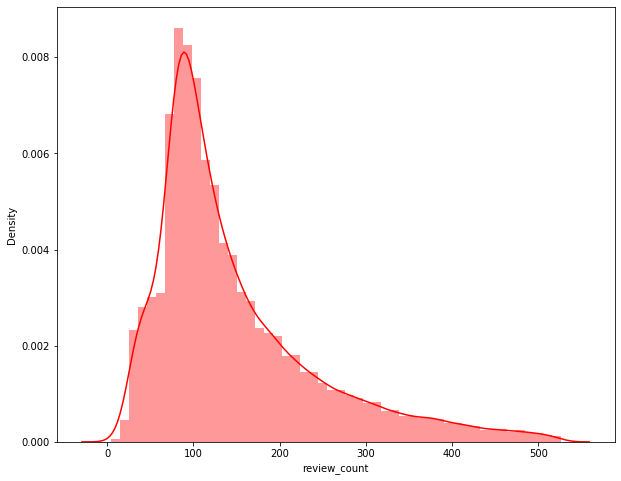

In [42]:
#Visualizing the review count using the distribution plot after removing the outliers
plt.figure(figsize=(10,8))
sns.distplot(df_new['review_count'],color='red')
plt.show()

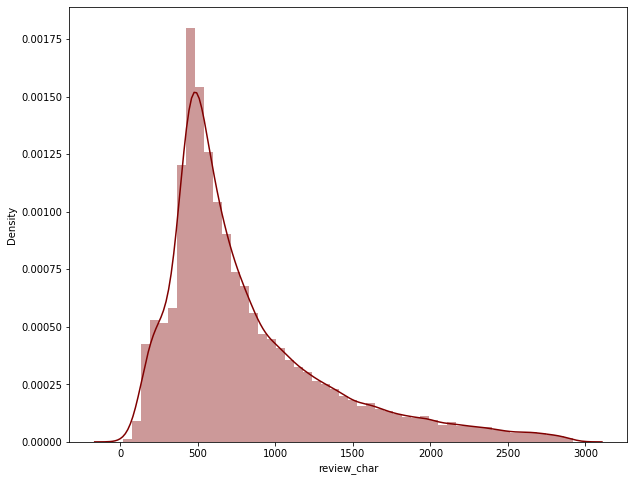

In [43]:
#Visualizing the review char using the distribution plot after removing the outliers
plt.figure(figsize=(10,8))
sns.distplot(df_new['review_char'],color='maroon')
plt.show()

We have successfully removed the outliers from review.

# Correlation

In [87]:
#Checking the correlation of data
df_new.corr()

,sentiment,review_count,review_char
sentiment,1.000000,0.021166,0.003012
review_count,0.021166,1.000000,0.988939
review_char,0.003012,0.988939,1.000000


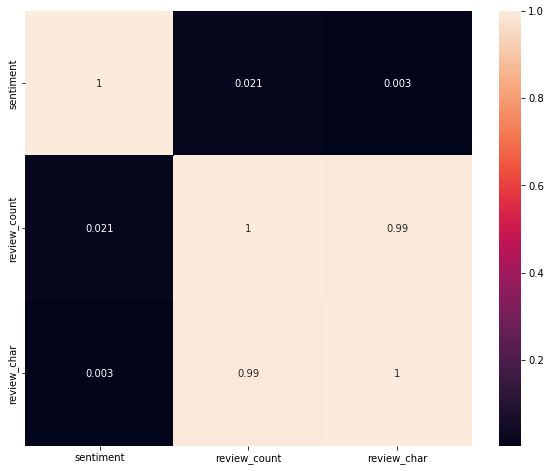

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True)
plt.show()

# Skewness

In [44]:
df_new.skew()

sentiment      -0.006568
review_count    1.465422
review_char     1.484554
dtype: float64

Let's remove the Skewness which is more than +5 and less than -5.

In [45]:
from sklearn.preprocessing import PowerTransformer

In [46]:
skewed=['review_count','review_char']

In [47]:
scaled=PowerTransformer(method='yeo-johnson')
scaled

PowerTransformer()

In [48]:
df_new[skewed]=scaled.fit_transform(df_new[skewed].values)
df_new[skewed]

,review_count,review_char
0,0.967699,0.929522
1,-0.116305,0.076342
2,-0.144751,-0.147524
3,-0.476986,-0.540445
4,0.390845,0.463785
...,...,...
24996,-0.102261,-0.258054
24997,-0.915257,-0.767711
24998,0.272114,0.375115
24999,0.238222,0.407066


In [49]:
df_new.skew()

sentiment      -0.006568
review_count    0.000101
review_char     0.000216
dtype: float64

We have removed the skewness from review_count and review_char

# Word Cloud

In [50]:
from wordcloud import WordCloud

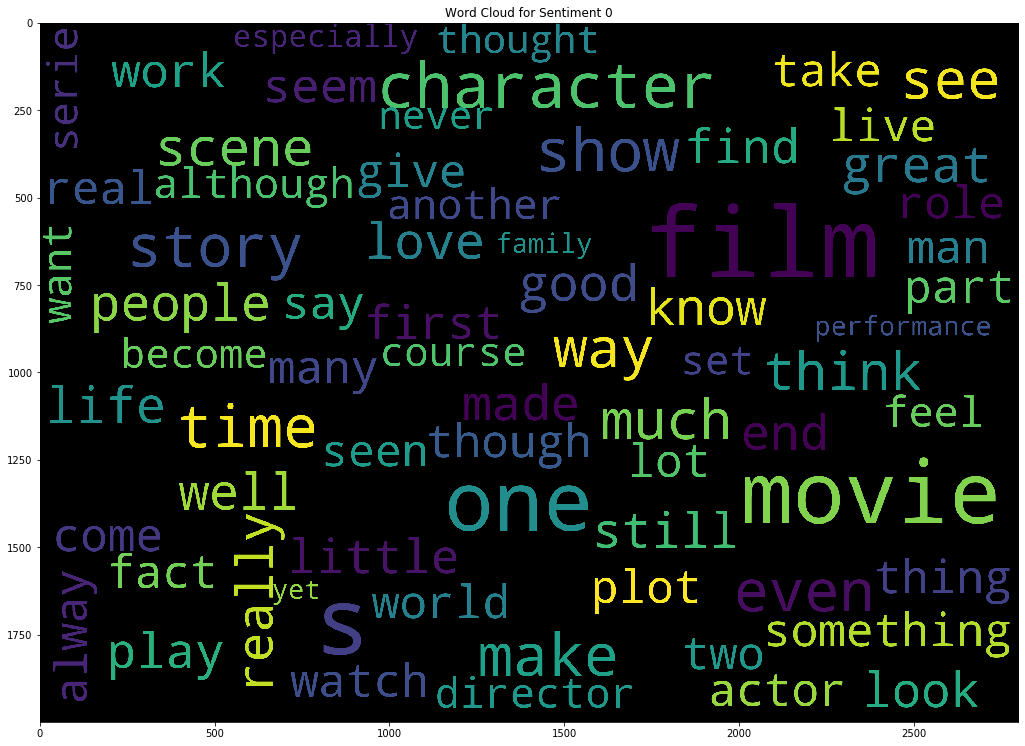

In [51]:
plt.figure(figsize=(15,10))
s=df['review'][df['sentiment']==0]
word_cloud=WordCloud(height=500,width=700,background_color='black',max_words=70,max_font_size=70,scale=4).generate(' '.join(s))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Sentiment 0")
plt.show()


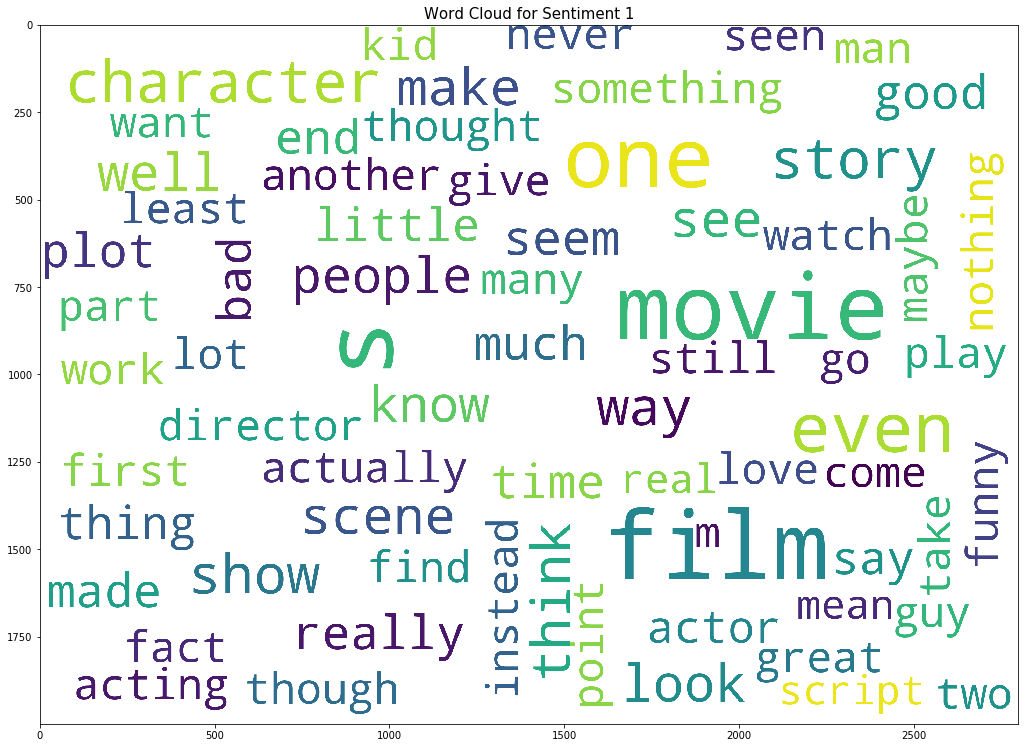

In [52]:
plt.figure(figsize=(15,10))
s=df['review'][df['sentiment']==1]
word_cloud=WordCloud(height=500,width=700,background_color='white',max_words=70,max_font_size=70,scale=4).generate(' '.join(s))
plt.imshow(word_cloud)
plt.tight_layout(pad=0)
plt.title("Word Cloud for Sentiment 1",fontsize=15)
plt.show()

# Model Building

In [53]:
#Splitting the data into features and target variable
x=df_new['review']
y=df_new['sentiment']

In [54]:
x.shape

(48720,)

In [55]:
y.value_counts()

1    24440
0    24280
Name: sentiment, dtype: int64

Our target data is balanced.

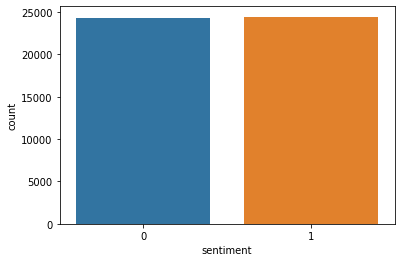

In [56]:
sns.countplot(y)
plt.show()

### Converting the review data into Vector using Tfidf Vectorizer.

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)

word_vectorizer.fit(x)
word_features=word_vectorizer.transform(x)
word_features

<48720x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 5222587 stored elements in Compressed Sparse Row format>

In [59]:
character_vectorizer=TfidfVectorizer(sublinear_tf=True,
                                    strip_accents='unicode',
                                    analyzer='word',
                                    stop_words='english',
                                    ngram_range=(2,6),
                                    max_features=50000)
character_vectorizer.fit(x)
character_features=character_vectorizer.transform(x)
character_features

<48720x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 1153283 stored elements in Compressed Sparse Row format>

In [60]:
#Combining both word and character vector as input
from scipy.sparse import hstack

In [61]:
feature=hstack([word_features,character_features])
feature

<48720x150000 sparse matrix of type '<class 'numpy.float64'>'
	with 6375870 stored elements in COOrdinate format>

In [62]:
#Splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(feature,y,test_size=.30,random_state=45)

In [63]:
x_train.shape

(34104, 150000)

In [64]:
x_test.shape

(14616, 150000)

In [65]:
y_train.shape

(34104,)

In [66]:
y_test.shape

(14616,)

In [67]:
#Importing the ML Algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier


In [68]:
#Initiating the model
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
gnb=GaussianNB()
sgd=SGDClassifier()
knn=KNeighborsClassifier()

In [69]:
#Defining the model
from sklearn.metrics import mean_squared_error,mean_absolute_error, hamming_loss
def algorithm(model):
    print("*"*30+model.__class__.__name__+"*"*30)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("Accuracy Score:",accuracy_score(y_test,pred)*100,'\n')
    print("Classification Report:\n",classification_report(y_test,pred))
    print("Confusion Matrix:\n",confusion_matrix(y_test,pred),'\n')
    print("Mean Squared Error:",mean_squared_error(y_test,pred))
    print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
    print("Hamming Loss:",hamming_loss(y_test,pred))
    print("*"*60)
    print('\n\n')
    

In [70]:
for model in [lg,dtc,rf,gbc,ada,sgd,knn]:
    algorithm(model)

******************************LogisticRegression******************************
Accuracy Score: 89.69622331691298 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      7358
           1       0.90      0.89      0.90      7258

    accuracy                           0.90     14616
   macro avg       0.90      0.90      0.90     14616
weighted avg       0.90      0.90      0.90     14616

Confusion Matrix:
 [[6669  689]
 [ 817 6441]] 

Mean Squared Error: 0.10303776683087028
Mean Absolute Error: 0.10303776683087028
Hamming Loss: 0.10303776683087028
************************************************************



******************************DecisionTreeClassifier******************************
Accuracy Score: 72.9064039408867 

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      7358
           1       0.72      0.74      0.73      7258

 

# Cross Validation Score

In [71]:
def cross_val(CV):
    print("*"*30+CV.__class__.__name__,"*"*30)
    print("Cross Validation Score:",cross_val_score(CV,feature,y,cv=3).mean()*100)
    print('\n')

In [72]:
for CV in [lg,dtc,rf,gbc,ada,sgd,knn]:
    cross_val(CV)

******************************LogisticRegression ******************************
Cross Validation Score: 89.72290640394088


******************************DecisionTreeClassifier ******************************
Cross Validation Score: 72.86740558292283


******************************RandomForestClassifier ******************************
Cross Validation Score: 85.91133004926107


******************************GradientBoostingClassifier ******************************
Cross Validation Score: 80.51518883415434


******************************AdaBoostClassifier ******************************
Cross Validation Score: 80.07389162561577


******************************SGDClassifier ******************************
Cross Validation Score: 89.79474548440066


******************************KNeighborsClassifier ******************************
Cross Validation Score: 54.26313628899836




After analysis of varion model and its accuracy score. Logistic Regression gives a good score 90%. We will consider Logistic Regression as our final model. Let's do the hyper parameter tuning to increase the accuracy.

# Hyper Parameter Tunning

In [73]:
from sklearn.model_selection import GridSearchCV


param_grid = [    
    {'penalty' : ['l1',  'elasticnet'],
    'C' : np.logspace(4, 20),
    'solver' : ['lbfgs','newton-cg','saga'],
    'max_iter' : [100, 1000]
    }
]

clf=GridSearchCV(lg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf=clf.fit(x_train,y_train)

best_clf.best_estimator_

# Final Model

In [75]:
final_model=LogisticRegression(solver='saga',n_jobs=-1,verbose=True)
final_model.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


convergence after 21 epochs took 5 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.5s finished


LogisticRegression(n_jobs=-1, solver='saga', verbose=True)

In [76]:
prediction=final_model.predict(x_test)
print(prediction)

[1 0 0 ... 1 1 0]


In [78]:
print("Acuracy Score:",accuracy_score(y_test,prediction)*100,'\n')
print("Classification Report:\n",classification_report(y_test,prediction),'\n')
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction),'\n')
print("Hamming Loss:",hamming_loss(y_test,prediction))

Acuracy Score: 89.69622331691298 

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      7358
           1       0.90      0.89      0.90      7258

    accuracy                           0.90     14616
   macro avg       0.90      0.90      0.90     14616
weighted avg       0.90      0.90      0.90     14616
 

Confusion Matrix:
 [[6669  689]
 [ 817 6441]] 

Hamming Loss: 0.10303776683087028


We got the final model accuracy 90%. Which is a good accuracy. We will save this model.

# Saving the model

In [79]:
import pickle

In [80]:
filename='IMDB_review.pickle'

In [81]:
pickle.dump(final_model,open(filename,'wb'))

In [82]:
loaded_model=pickle.load(open(filename,'rb'))

In [83]:
predict=loaded_model.predict(x_test)
predict

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [84]:
dfs=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['Predicted','Actual'])
dfs

,0,1,2,3,4,5,6,7,8,9,...,14606,14607,14608,14609,14610,14611,14612,14613,14614,14615
Predicted,1,0,0,1,0,0,1,1,1,0,...,1,1,1,1,1,0,0,1,1,0
Actual,1,0,0,1,0,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,0


In [85]:
dfs.T

,Predicted,Actual
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
14611,0,1
14612,0,1
14613,1,1
14614,1,1


Here is the predicted and actual value for IMDB Review. Our model has predicted almost similar to the actual value. Based on this one can decide whether the movie is worth to watch or not.

In [86]:
#Save the predicted data in csv file
dfs.to_csv('IMDB_Review_Prediction.csv')

# Conclusion

Before buildig the model, we have clean the data using the Natural Language Processing. Removed the stop words, punctuation, irrelevant words using the regular expression. Based on the Review and Sentiment, we have used various machine learning model to make the final prediction. In this IMDB Review project Logistic Regression has performed well by giving the 90% accuracy. With this prediction we can say whether the movie is worth to watch or not.